
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import os
import json
from pprint import pprint
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from modules.JSONFramer import JSONFramer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# ChatGPT 
def get_nested_value(data, *keys):
    try:
        for key in keys:
            data = data[key]
        return data
    except (TypeError, KeyError):
        return None

#make list of file names in data folder
file_list = os.listdir('../data')

# Create a dataframe to store all data
all_data = pd.DataFrame()

# i = 0

#loop through filenames in list 
for file in file_list:
    # i += 1
    # print(i)
    try:
        #load json object
        with open('../data/' + file) as f:
            nested_json = json.load(f)
            response_data = nested_json['data']['results']
            # List to store data from file
            extracted_data = []
            for result in response_data:
                row = {
                    'branding_name': nested_json['data']['results'][0]['branding'][0]['name'],  
                    'baths': get_nested_value(result, 'description', 'baths'),
                    'baths_1qtr': get_nested_value(result, 'description', 'baths_1qtr'),
                    'baths_3qr': get_nested_value(result, 'description', 'baths_3qr'),
                    'baths_full': get_nested_value(result, 'description', 'baths_full'),
                    'baths_half': get_nested_value(result, 'description', 'baths_half'),
                    'beds': get_nested_value(result, 'description', 'beds'),
                    'garage': get_nested_value(result, 'description', 'garage'),
                    'lot_sqft': get_nested_value(result, 'description', 'lot_sqft'),
                    'name': get_nested_value(result, 'description', 'name'),
                    'sold_date': get_nested_value(result, 'description', 'sold_date'),
                    'sold_price': get_nested_value(result, 'description', 'sold_price'),
                    'sqft': get_nested_value(result, 'description', 'sqft'),
                    'stories': get_nested_value(result, 'description', 'stories'),
                    'sub_type': get_nested_value(result, 'description', 'sub_type'),
                    'type': get_nested_value(result, 'description', 'type'),
                    'year_built': get_nested_value(result, 'description', 'year_built'),                    
                    'is_coming_soon': get_nested_value(result, 'flags', 'is_coming_soon'),
                    'is_contingent': get_nested_value(result, 'flags', 'is_contingent'),
                    'is_for_rent': get_nested_value(result, 'flags', 'is_for_rent'),
                    'is_foreclosure': get_nested_value(result, 'flags', 'is_foreclosure'),
                    'is_new_construction': get_nested_value(result, 'flags', 'is_new_construction'),
                    'is_new_listing': get_nested_value(result, 'flags', 'is_new_listing'),
                    'is_pending': get_nested_value(result, 'flags', 'is_pending'),
                    'is_plan': get_nested_value(result, 'flags', 'is_plan'),
                    'is_price_reduced': get_nested_value(result, 'flags', 'is_price_reduced'),
                    'is_subdivision': get_nested_value(result, 'flags', 'is_subdivision'),                   
                    'last_update_date': get_nested_value(result, 'last_update_date'),
                    'show_contact_an_agent': get_nested_value(result, 'lead_attributes', 'show_contact_an_agent'),
                    'list_date': get_nested_value(result, 'list_date'),
                    'list_price': get_nested_value(result, 'list_price'),
                    'listing_id': get_nested_value(result, 'listing_id'),
                    'city': get_nested_value(result, 'location', 'address', 'city'),
                    'lat': get_nested_value(result, 'location', 'address', 'coordinate', 'lat'),
                    'lon': get_nested_value(result, 'location', 'address', 'coordinate', 'lon'),
                    'line': get_nested_value(result, 'location', 'address', 'line'),
                    'postal_code': get_nested_value(result, 'location', 'address', 'postal_code'),
                    'state': get_nested_value(result, 'location', 'address', 'state'),
                    'state_code': get_nested_value(result, 'location', 'address', 'state_code'),
                    'open_houses': get_nested_value(result, 'open_houses'),
                    'price_reduced_amount': get_nested_value(result, 'price_reduced_amount'),
                    'brand_name': get_nested_value(result, 'products', 'brand_name'),
                    'property_id': get_nested_value(result, 'property_id'),
                    'status': get_nested_value(result, 'status'),
                    'tags': get_nested_value(result, 'tags'),
                }
                extracted_data.append(row)
        extracted_dataframe = pd.DataFrame(extracted_data).drop_duplicates("property_id")
        all_data = pd.concat([all_data, extracted_dataframe])
    except:
        continue
df = all_data
# # print(all_data.info())
print(df.shape)
df.head()

(8159, 45)


,branding_name,baths,baths_1qtr,baths_3qr,baths_full,baths_half,beds,garage,lot_sqft,name,sold_date,sold_price,sqft,stories,sub_type,type,year_built,is_coming_soon,is_contingent,is_for_rent,is_foreclosure,is_new_construction,is_new_listing,is_pending,is_plan,is_price_reduced,is_subdivision,last_update_date,show_contact_an_agent,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,open_houses,price_reduced_amount,brand_name,property_id,status,tags
0,EXP Realty LLC - Southeast Alaska,2.0,None,None,2.0,NaN,3.0,1.0,10454.0,None,2023-09-18,None,1821.0,NaN,None,single_family,1963.0,None,None,None,None,None,False,None,None,False,None,2023-09-19T20:52:50Z,True,2023-06-29T21:16:25.000000Z,554950.0,2957241843,Juneau,58.36395,-134.59372,9453 Herbert Pl,99801,Alaska,AK,None,45000.0,basic_opt_in,9074430767,sold,"[carport, community_outdoor_space, cul_de_sac,..."
1,EXP Realty LLC - Southeast Alaska,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,True,None,NaN,None,Juneau,NaN,NaN,8477 Thunder Mountain Rd,99801,Alaska,AK,None,NaN,None,9424983842,sold,None
2,EXP Realty LLC - Southeast Alaska,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,True,None,NaN,None,Juneau,NaN,NaN,4515 Glacier Hwy,99801,Alaska,AK,None,NaN,None,9479068516,sold,None
3,EXP Realty LLC - Southeast Alaska,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,True,None,NaN,None,Juneau,NaN,NaN,17850 Point Stephens Rd,99801,Alaska,AK,None,NaN,None,9879331943,sold,None
4,EXP Realty LLC - Southeast Alaska,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,True,None,NaN,None,Juneau,NaN,NaN,9951 Stephen Richards Memorial Dr,99801,Alaska,AK,None,NaN,None,9521639574,sold,None


In [3]:
df.reset_index(drop=True, inplace=True)
# df.info()

In [4]:
#count unique property ids
df['property_id'].nunique()
#1795 unique property_ids in a dataframe of 8159 rows indicates that row duplication exists for each property

1795

In [5]:
#display df sorted by 'property_id' column to visually inspect the data
df.sort_values(by=['property_id']).head(6)
#Quick check shows that multiple values for 'branding_name' column exist for each property_id

,branding_name,baths,baths_1qtr,baths_3qr,baths_full,baths_half,beds,garage,lot_sqft,name,sold_date,sold_price,sqft,stories,sub_type,type,year_built,is_coming_soon,is_contingent,is_for_rent,is_foreclosure,is_new_construction,is_new_listing,is_pending,is_plan,is_price_reduced,is_subdivision,last_update_date,show_contact_an_agent,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,open_houses,price_reduced_amount,brand_name,property_id,status,tags
5404,Compass,3.0,None,None,3.0,NaN,3.0,5.0,43560,None,2023-12-15,925000,2980.0,1.0,None,single_family,1978.0,None,None,None,None,None,False,None,None,None,None,2023-12-15T21:25:24Z,True,2023-09-25T16:20:27.000000Z,925000,2959966417,Carson City,39.093819,-119.79112,3527 Arcadia Dr,89705,Nevada,NV,None,NaN,basic_opt_in,1003442504,sold,"[community_outdoor_space, energy_efficient, fa..."
476,"Sell Your Home Services, Inc.",3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000.0,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
647,Cooper Premier Properties Llc,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000.0,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
558,My Home Group Real Estate,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000.0,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
599,Keller Williams Realty Sonoran Living,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000.0,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
517,"Weichert, Realtors - Courtney Valleywide",3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000.0,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."


In [6]:
#check shape of the df after dropping duplicated 'branding_name' column and unhashable 'tags' column
temp_dataframe = df.drop(columns =['branding_name','tags'])
temp_dataframe.drop_duplicates().shape
#1795 rows is same number as unique property ids, therefore eliminating the branding_name column will remove duplicates

(1795, 43)

In [7]:
# #Note: the 'tags' column was checked for duplication by converting the list type of each value to a string and then applying '.drop_duplicates'

# def tas_to_string...

# string_data = all_data
# string_data.loc[:, 'tags'] = string_data['tags'].apply(lambda x: tags_to_string(x))

# string_data.drop_duplicates().info()

# # No duplication was found

In [8]:
#check to see how many unique 'branding_name' values there are (just in case there were only a few and we could keep this column)
len(df['branding_name'].unique())
#As expected, there are too many (172) so the column can be dropped

172

**-Drop Columns:**

In [9]:
#drop the 'branding_name' column 
#also drop all columns with 0 non-null values including the following:
df = df.drop(columns = ['branding_name', 'baths_1qtr', 'baths_3qr', 'name', 'is_coming_soon', 'is_contingent', 'is_for_rent', 'is_new_construction', 'is_pending', 'is_plan', 'is_subdivision', 'open_houses'])

# df = dataframe.drop_duplicates()
# df.info()

**-Drop rows where target column is null:** 

In [10]:
#Because our model's target variable is 'sold_price', we can drop all rows where this is null
df.dropna(subset=['sold_price'], inplace=True)
df.shape

(6716, 33)

**-Encode 'tags' in columns:**

In [11]:
#we need to explode and one-hot-code the 'tags' column
#(this needs to be done before dropping duplicated as the list data type for tags values is unhashable)

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
s = df['tags'].apply(lambda x: x if x is not None else [])
binarized_tags = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)

binarized_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8158
Columns: 152 entries, baseball to wrap_around_porch
dtypes: int32(152)
memory usage: 3.9 MB


In [13]:
df = df.merge(binarized_tags, left_index=True, right_index=True).drop(columns='tags')
df = df.drop_duplicates()

In [14]:
df.columns

Index(['baths', 'baths_full', 'baths_half', 'beds', 'garage', 'lot_sqft',
       'sold_date', 'sold_price', 'sqft', 'stories',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=184)

In [15]:
#Drop 'tags' column
#Perform count for all newly created binary tag columns / by total row count
#Drop all binary tag columns that are represented in less that [10%?] of the data



binarized_tags_dict = (df.loc[:, mlb.classes_.tolist()].sum()/df.shape[0]).to_dict()

binarized_tags_list = []

for key in binarized_tags_dict.keys():
    if binarized_tags_dict[key] < 0.05:
        binarized_tags_list.append(key)

print(binarized_tags_list[0:5])
len(binarized_tags_list)

['baseball', 'basketball', 'basketball_court', 'beach', 'beautiful_backyard']


105

In [16]:
df = df.drop(columns=binarized_tags_list)

In [17]:
# df.info()

**-Fill N/A Values**

In [18]:
#fill N/A values with zeros for 'baths_half', 'garage', price_reduced_amount
df.update(df[['baths_full','baths_half', 'garage', 'price_reduced_amount']].fillna(0))

In [19]:
#fill N/A values with 'False' for 'is_price_reduced'
df['is_price_reduced'].fillna(False, inplace=True)

**-Drop more unecessary Columns**

In [20]:
#drop 'sub-type' column as it appears to be either missing or very similar to type in most instances
df.drop(columns='sub_type', inplace=True)

In [21]:
#We can probably drop 'last_update' column as I assume it has to do with website or realtor activity
df.drop(columns='last_update_date', inplace=True)

In [22]:
#Only False values for this column so we can drop it
#It might be the case that None type should be 'True' but I don't think we have enough info to make this inference
df.drop(columns='is_new_listing', inplace=True)

In [23]:
#Not obvious what brand name is - I suggest we drop but we could also just try modelling with it left in
df.drop(columns='brand_name', inplace=True)

In [24]:
#status is always sold so we can drop this
df.drop(columns='status', inplace=True)

In [25]:
df.drop(columns='show_contact_an_agent', inplace=True)

In [26]:
#Do we want to drop the foreclosure column because so few data points exist?
df.drop(columns='is_foreclosure', inplace=True)
#Alternatively we can just fill thse values null values with False

**-Fill NA values with zeros for 'baths','beds', 'sqft', 'stories', 'year_built' columns where value in 'type' column == land**

In [27]:
# NA value check prior to fill
# df[df['beds'].isna()].head(2)
#major reason for NA values in 'baths','beds', 'sqft', 'stories', 'year_built' columns is that 'type' column == land

In [28]:
#fill N/A values with zeros for 'baths','beds', 'sqft', 'stories', 'year_built' columns where value in 'type' column == land
df.update(df.loc[df['type'].isin(['land'])][['baths', 'beds', 'sqft', 'stories', 'year_built']].fillna(0))

In [29]:
# NA value check following fill
# print(df[df['beds'].isna()].shape)

In [30]:
# print(df.info())

#Remaining columns with Null values
# #   Column                       Non-Null Count  Dtype  
# ---  ------                       --------------  -----  
#  0   baths                        1446 non-null   float64
# 3   beds                         1438 non-null   object 
#  5   lot_sqft                     1275 non-null   object 
# 8   sqft                         1402 non-null   object 
#  9   stories                      1190 non-null   object 
#  10  type                         1471 non-null   object 
#  11  year_built                   1400 non-null   object 
# 13  list_date                    1412 non-null   object 
#  14  list_price                   1412 non-null   object 
#  15  listing_id                   1412 non-null   object 
#  16  city                         1474 non-null   object 
#  17  lat                          1435 non-null   object 
#  18  lon                          1435 non-null   object 
#  19  line                         1474 non-null   object 

**-Drop Rows where value is NA for 'type' column**

In [31]:
#Drop rows where 'type' coulmn is NA as listing type is used to fill following columns 
df.dropna(axis=0,subset=['type'], inplace=True)
df.shape
#only 4 listings lost and the rows lost were missing a lot of other features

(1471, 72)

**-Fill NA values in 'baths', 'beds', 'stories' with median value grouped by 'type' column**<br>
**-Fill NA values in 'lot_sqft', 'sqft' with mean value grouped by the 'type' column**

In [32]:
# NA value check prior to fill
df[df['lot_sqft'].isna()].sample(10)

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_date,sold_price,sqft,stories,type,year_built,is_price_reduced,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer
5740,0.0,0.0,0.0,0.0,0.0,NaN,2023-09-08,494800,0.0,0.0,land,0.0,False,None,NaN,None,Westerville,40.112931,-82.86223,5744 Pocatello Dr,43081,Ohio,OH,0.0,9038126962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7975,1.0,1.0,0.0,3.0,0.0,NaN,2023-10-10,15400,NaN,NaN,single_family,NaN,False,2023-08-10T22:20:26Z,20123,2958564070,Charleston,38.348882,-81.603766,119 Westview Dr,25311,West Virginia,WV,0.0,3187445189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5655,0.0,0.0,0.0,0.0,0.0,NaN,2023-09-12,350300,0.0,0.0,land,0.0,False,None,NaN,None,Canal Winchester,39.890645,-82.851837,5367 Coble Park Dr,43110,Ohio,OH,0.0,9757638699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6697,1.0,1.0,0.0,1.0,0.0,NaN,2023-07-27,165000,556.0,NaN,condo_townhome_rowhome_coop,1930.0,False,2023-07-08T12:36:37Z,165000,2957500726,Columbia,33.999073,-81.003883,705 Maple St,29205,South Carolina,SC,0.0,9063303213,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
5654,0.0,0.0,0.0,NaN,0.0,NaN,2023-09-12,748900,NaN,NaN,condo,NaN,False,None,NaN,None,Columbus,NaN,NaN,2876 Kobuk Dr # A,43228,Ohio,OH,0.0,9531561471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7780,2.0,2.0,0.0,2,2.0,NaN,2024-01-02,250000,1219,NaN,condos,2007,False,2023-11-07T14:56:36.000000Z,250000,2961418467,Madison,43.005469,-89.500143,3848 Maple Grove Dr Apt 107,53719,Wisconsin,WI,0.0,8244577290,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
2787,2.0,2.0,0.0,3.0,2.0,NaN,2024-01-03,292000,1540.0,1.0,single_family,1998.0,False,2023-10-25T19:23:27.000000Z,299900,2960866536,Frankfort,38.151322,-84.889669,1022 Aderly Ln,40601,Kentucky,KY,0.0,4618801671,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1950,2.0,1.0,0.0,2.0,1.0,NaN,2024-01-08,155000,1038.0,NaN,condos,1970.0,False,2023-09-14T12:49:54.000000Z,155000,2959657256,Des Moines,41.583796,-93.660038,3100 Grand Ave Apt 3B,50312,Iowa,IA,0.0,7996957148,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
273,2.0,1.0,1.0,2.0,0.0,NaN,2024-01-05,100000,1054.0,2.0,townhomes,1981.0,False,2023-12-02T02:19:34.000000Z,103000.0,2962179589,Little Rock,34.758465,-92.399841,504 Green Mountain Dr,72211,Arkansas,AR,0.0,7507734163,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
1322,2.0,1.0,1.0,2.0,0.0,NaN,2023-12-05,115000,800.0,3.0,condos,1981.0,False,2023-09-14T04:15:24.000000Z,119500.0,2959652322,Dover,39.159729,-75.562627,36 Courtside Dr Apt A23,19904,Delaware,DE,3000.0,5620324514,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,0,1


In [33]:
#Fill NA values in 'baths' column with the median bath value grouped by the corresponding 'type' column  
df['baths'] = df['baths'].fillna(df.groupby('type')['baths'].transform('median'))

#Fill NA values in 'beds' column with the median beds value grouped by the corresponding 'type' column  
df['beds'] = df['beds'].fillna(df.groupby('type')['beds'].transform('median'))

#Fill NA values in 'stories' column with the median stories value grouped by the corresponding 'type' column  
df['stories'] = df['stories'].fillna(df.groupby('type')['stories'].transform('median'))

#Fill NA values in 'lot_sqft' column with the mean lot_sqft value grouped by the corresponding 'type' column  
df['lot_sqft'] = df['lot_sqft'].fillna(df.groupby('type')['lot_sqft'].transform('mean'))

#Fill NA values in 'sqft' column with the mean sqft value grouped by the corresponding 'type' column  
df['sqft'] = df['sqft'].fillna(df.groupby('type')['sqft'].transform('mean'))

C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [34]:
# NA value check following fill
# df.loc[df['property_id'].isin(['7526785866', '4104926733', '4750734663'])]

**-Fill NA values in 'year_built' with median value grouped by 'type' column** 

In [35]:
# NA value check prior to fill
df[df['year_built'].isna()].head(3)

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_date,sold_price,sqft,stories,type,year_built,is_price_reduced,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer
2347,0.0,0.0,0.0,3.0,0.0,24534.195789,2023-12-27,27065000.0,1918.739085,1.0,single_family,NaN,False,None,NaN,None,Springfield,NaN,NaN,3501 Old Jacksonville Rd,62711,Illinois,IL,0.0,9627477899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2352,2.0,2.0,0.0,3.0,1.0,5968.000000,2023-12-07,155000.0,1280.000000,1.0,single_family,NaN,False,2023-10-31T02:13:07.000000Z,154900.0,2961027941,Springfield,39.827903,-89.612462,2008 Stanhope Rd,62702,Illinois,IL,0.0,8549151593,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2366,0.0,0.0,0.0,2.0,0.0,1517.500000,2023-08-14,119900.0,1389.500000,1.0,condo,NaN,False,None,NaN,None,Springfield,39.820301,-89.704559,83 Amherst Dr,62702,Illinois,IL,0.0,8559138865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#Fill NA values in 'year_built' column with the median year_built value grouped by the corresponding 'type' column  
df['year_built'] = df['year_built'].fillna(df.groupby('city')['year_built'].transform('median'))

C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [37]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9627477899', '8549151593', '8559138865'])]

**-Fill NA values in 'list_price' with value in 'sold_price' column** 

In [38]:
# NA value check prior to fill
# df[df['list_price'].isna()].head(3)

In [39]:
df['list_price'] = df['list_price'].fillna(df['sold_price'])

In [40]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9940859323', '9291003749', '9233144971'])]

**-Fill single missing city value...**

In [41]:
# NA value check prior to fill
# df[df['city'].isna()].head(3)

In [42]:
# #Fill NA values in 'city' column with the median city value grouped by the corresponding 'postal_code' column  
# # Not wokring... Not sure why.  
# df['city'] = df['city'].fillna(df.groupby(['postal_code'])['city'].agg(pd.Series.mode))
# # Fill with 'Boston' for now...

df['city'] = df['city'].fillna('Boston')

In [43]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9712785298'])]

**-Fill NA values for 'lat' and 'lon' with median values grouped by 'state' and 'city' column**

In [44]:
# NA value check prior to fill
# df[df['lat'].isna()].head(3)

In [45]:
#Fill NA values in 'lat' column with the median lat value grouped by the corresponding 'state' and 'city' column  
df['lat'] = df['lat'].fillna(df.groupby(['state', 'city'])['lat'].transform('median'))

C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [46]:
#Fill NA values in 'lon' column with the median lon value grouped by the corresponding 'postal_code' column  
df['lon'] = df['lon'].fillna(df.groupby(['state', 'city'])['lon'].transform('median'))

C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\alexa\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [47]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9934955122', '9118590787', '9904165467'])]

**-Convert 'sold_date' and 'list_date' to datetime values and remove timestamp from list_date**

In [48]:
#Check prior to datetime and format conversion
print(df.iloc[:,:14].head(1))

    baths baths_full baths_half  beds garage  lot_sqft   sold_date sold_price  \
30    2.0        2.0        0.0   3.0    2.0   11761.0  2024-01-16     129900   

      sqft  stories           type  year_built  is_price_reduced  \
30  1478.0      1.0  single_family      1998.0             False   

                      list_date  
30  2023-12-19T18:08:22.000000Z  


In [49]:
# Convert 'sold_date' and 'list_date' to datetime
df['sold_date'] = pd.to_datetime(df['sold_date'])
# df['list_date'] = pd.to_datetime(df['list_date'], format='mixed')
df['list_date'] = df['list_date'].apply(lambda x: datetime.datetime.strptime(str(x)[:10], '%Y-%m-%d') if x is not None else None)
# df['list_date'] = pd.to_datetime(df['list_date'], format='%Y-%m-%d')
# df['list_date'] = df['list_date'].dt.date
# df['sold_date'] = df['sold_date'].dt.date

In [50]:
#Check following datetime and format conversion
print(df.iloc[:,:14].head(1))
print(df['list_date'].dtype)
print(df['sold_date'].dtype)

    baths baths_full baths_half  beds garage  lot_sqft  sold_date sold_price  \
30    2.0        2.0        0.0   3.0    2.0   11761.0 2024-01-16     129900   

      sqft  stories           type  year_built  is_price_reduced  list_date  
30  1478.0      1.0  single_family      1998.0             False 2023-12-19  
datetime64[ns]
datetime64[ns]


**-Fill NA values for list_date with sold_date subtract 75days**

In [51]:
# NA value check prior to fill
df[df['list_date'].isna()].head(3)

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_date,sold_price,sqft,stories,type,year_built,is_price_reduced,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer
1920,1.0,1.0,0.0,2.0,0.0,24534.195789,2023-09-29,880000,592.0,1.0,single_family,1929.0,False,NaT,880000.0,None,Honolulu,21.287097,-157.810583,1115 2nd Ave Apt C,96816,Hawaii,HI,0.0,9940859323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1.0,1.0,1.0,3.0,0.0,24534.195789,2023-08-23,1048000,799.0,1.0,single_family,1966.0,False,NaT,1048000.0,None,Honolulu,21.277707,-157.810401,3331 Herbert St Apt A,96815,Hawaii,HI,0.0,9291003749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,2.0,2.0,0.0,3.0,0.0,24534.195789,2023-07-24,1100000,2944.0,1.0,single_family,1961.0,False,NaT,1100000.0,None,Honolulu,21.279435,-157.799782,3620 Pahoa Ave Apt A,96816,Hawaii,HI,0.0,9233144971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Fill NA values for list_date with (sold_date - 75days)
# df['list_date'] = df['list_date'].fillna(df['sold_date'])
df['list_date'] = df['list_date'].fillna(df['sold_date'] - pd.Timedelta(days=75))

# Convert the 'list_date' column to datetime format eagain
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')

# Extract only date part again
# df['list_date'] = df['list_date'].apply(lambda x: datetime.date(x))

In [53]:
# NA value check following fill
print(df['sold_date'].dtype)
df.loc[df['property_id'].isin(['9940859323', '9291003749', '9233144971'])]

datetime64[ns]


,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_date,sold_price,sqft,stories,type,year_built,is_price_reduced,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer
1920,1.0,1.0,0.0,2.0,0.0,24534.195789,2023-09-29,880000,592.0,1.0,single_family,1929.0,False,2023-07-16,880000.0,None,Honolulu,21.287097,-157.810583,1115 2nd Ave Apt C,96816,Hawaii,HI,0.0,9940859323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1.0,1.0,1.0,3.0,0.0,24534.195789,2023-08-23,1048000,799.0,1.0,single_family,1966.0,False,2023-06-09,1048000.0,None,Honolulu,21.277707,-157.810401,3331 Herbert St Apt A,96815,Hawaii,HI,0.0,9291003749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,2.0,2.0,0.0,3.0,0.0,24534.195789,2023-07-24,1100000,2944.0,1.0,single_family,1961.0,False,2023-05-10,1100000.0,None,Honolulu,21.279435,-157.799782,3620 Pahoa Ave Apt A,96816,Hawaii,HI,0.0,9233144971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**-Time on Market, Month/Year Sold/Listed Columns**

In [54]:
df['sold_month'] = df['sold_date'].dt.month
df['sold_year'] = df['sold_date'].dt.year

In [55]:
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')
df['list_month'] = df['list_date'].dt.month
df['list_year'] = df['list_date'].dt.year

In [56]:
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')
# df['sold_date'] = pd.to_datetime(df['sold_date'], errors='coerce')

# create 'time_on_market' column calculated as (sold_date - list_date) 
df['time_on_market'] = (df['sold_date'] - df['list_date']).dt.days

**-Drop more columns which are not useful in EDA and modelling**

In [57]:
#Drop 'line' coulmn because it throws off the analysis and is not useful
df.drop(columns='line', inplace=True)

#Drop listing_id because we already have property_id to use as a key and listing_id should not affect sold_price (theoretically:)
df.drop(columns='listing_id', inplace=True)

#Drop datetime columns now that we have created new featured from them that can be more effectively used in analysis
df.drop(columns= ['list_date', 'sold_date'], inplace=True)

**-Replace Type for rare Type**

In [58]:
df['type'].value_counts()

type
single_family                  990
condos                         143
townhomes                      110
multi_family                   106
land                            72
mobile                          31
condo                           11
apartment                        4
other                            2
duplex_triplex                   1
condo_townhome_rowhome_coop      1
Name: count, dtype: int64

In [59]:
df['type'].mask(df['type'] == "condo_townhome_rowhome_coop", "townhomes", inplace=True)
df['type'].mask(df['type'] == "duplex_triplex", "townhomes", inplace=True)
df['type'].mask(df['type'] == "apartment", "condos", inplace=True)
df['type'].mask(df['type'] == "condo", "condos", inplace=True)

In [60]:
df['type'].value_counts()

type
single_family    990
condos           158
townhomes        112
multi_family     106
land              72
mobile            31
other              2
Name: count, dtype: int64

**-Drop type = other due to limited data and instances**

In [61]:
indices = df.loc[df['type'].isin(['other'])].index
df = df.drop(index = indices)

In [62]:
df['type'].value_counts()

type
single_family    990
condos           158
townhomes        112
multi_family     106
land              72
mobile            31
Name: count, dtype: int64

**-Check for duplicates in 'property_id' column**

In [63]:
#count unique property ids
df['property_id'].nunique()

1469

In [64]:
# df.info()

**-Drop all rows that still have NA values**

In [65]:
#The following columns still have NA values:
# df.info()
 # 5   lot_sqft                     1465 non-null   float64
 # 7   sqft                         1465 non-null   float64
 # 8   stories                      1465 non-null   float64
 # 10  year_built                   1463 non-null   float64
 # 14  lat                          1460 non-null   float64
 # 15  lon                          1460 non-null   float64
#Probably these were unable to fill via groupby medians, etc.

In [66]:
#Fill all NA values with mean of column
df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']] = df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']].fillna(df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']].mean())

**-Change data types of columns to enable EDA**

In [67]:
# Change dtype of target column to float
df['sold_price'] = df['sold_price'].astype(float)

# Change column data types to int where required
df = df.astype({'baths': int,'baths_full': int,'baths_half': int,'beds': int,'garage': int,'stories': int,'stories': int,'year_built': int})

# Change column data types to float where required
df = df.astype({'lot_sqft': float,'sold_price': float,'sqft': float,'list_price': float,'lat': float,'lon': float,'price_reduced_amount': float})

# Leave non-numeric columns as follows:
# type                            object
# is_price_reduced                  bool
# city                            object
# postal_code                     object
# state                           object
# state_code                      object
# property_id                     object

In [68]:
# print(df.dtypes)

**-Double check that all property ids are unique**

In [69]:
df['property_id'].nunique()

1469

**-EDA**

In [70]:
df.describe()

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,year_built,list_price,lat,lon,price_reduced_amount,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03,1.469000e+03,1469.000000,1469.000000,1469.000000,1.469000e+03,1469.000000,1469.000000,1.469000e+03,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,2.138189,1.702519,0.319946,3.059905,0.988428,1.383891e+05,4.243018e+05,1814.297636,1.462900,1869.756978,4.305137e+05,39.139811,-89.601254,7.416092e+03,0.435671,0.124575,0.072158,0.064670,0.513274,0.164738,0.151804,0.465623,0.198775,0.088496,0.078965,0.205582,0.052417,0.447924,0.069435,0.085773,0.154527,0.086453,0.147720,0.409122,0.121852,0.405037,0.060585,0.564329,0.371001,0.057862,0.051736,0.328114,0.058543,0.277059,0.051055,0.071477,0.110279,0.069435,0.061947,0.076242,0.225323,0.109598,0.238257,0.394826,0.053097,0.055820,0.394146,0.101430,0.196732,0.052417,0.275017,4.834581,2023.615385,9.496937,2023.008169,78.442478
std,1.155177,0.979003,0.533372,1.441107,1.153954,3.637183e+06,8.649833e+05,1319.651934,0.816731,426.102847,8.734400e+05,3.887704,15.721595,5.710174e+04,0.496013,0.330348,0.258837,0.246026,0.499994,0.371070,0.358953,0.498987,0.399214,0.284111,0.269776,0.404264,0.222942,0.497450,0.254279,0.280123,0.361576,0.281128,0.354943,0.491839,0.327226,0.491066,0.238650,0.496013,0.483237,0.233563,0.221569,0.469687,0.234848,0.447698,0.220185,0.257708,0.313344,0.254279,0.241141,0.265476,0.417937,0.312495,0.426162,0.488980,0.224304,0.229653,0.488833,0.301999,0.397664,0.222942,0.446675,4.955579,0.486670,2.394822,0.241901,89.002566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.080000e+02,0.000000,0.000000,0.000000,1.000000e+00,21.277707,-157.810583,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000,1.000000,2017.000000,-125.000000
25%,1.000000,1.000000,0.000000,2.000000,0.000000,5.227000e+03,1.950000e+05,1198.000000,1.000000,1932.000000,1.990000e+05,36.090894,-96.616681,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

<Axes: >

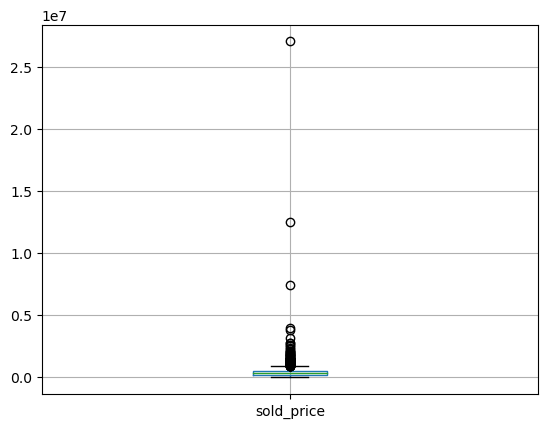

In [71]:
# Explore target with boxplot
df.boxplot(column=['sold_price'])
#It appears we have a large number of very high sold_price vaues that may be scewing the data

**-Drop rows where sold price > 5million**

In [72]:
#Only 3 instances of sold_price > 5 million
df.loc[df['sold_price'] > 5000000]

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,list_price,city,lat,lon,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market
2347,0,0,0,3,0,24534.195789,27065000.0,1918.739085,1,single_family,1995,False,27065000.0,Springfield,39.781624,-89.639238,62711,Illinois,IL,0.0,9627477899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2023,10,2023,75
3207,3,2,1,3,2,3392.000000,12500000.0,3392.000000,1,condos,2008,False,12500000.0,Boston,42.348709,-71.081650,02199,Massachusetts,MA,0.0,3202036012,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,2024,10,2023,97
3423,8,6,2,5,2,266587.000000,7400000.0,9571.000000,4,single_family,1997,False,7950000.0,Annapolis,38.932517,-76.481010,21403,Maryland,MD,345000.0,5377351791,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,2024,9,2023,117


In [73]:
#Drop rows where sold price > 5million
sold_price_outlier_indices = df.loc[df['sold_price'] > 5000000].index
print(sold_price_outlier_indices)
df = df.drop(index = sold_price_outlier_indices)

Index([2347, 3207, 3423], dtype='int64')


C:\Users\alexa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


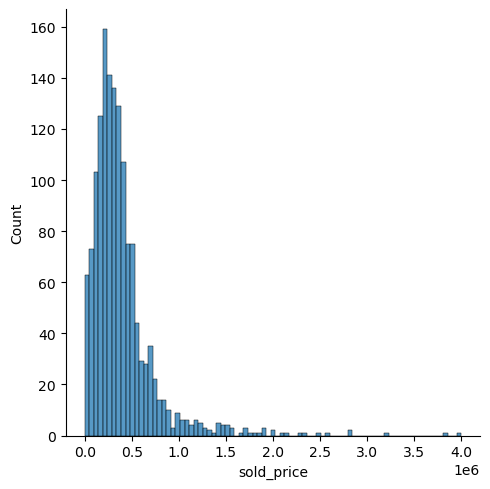

In [89]:
# Explore target with histogram
# sns.histplot(df['sold_price'])
sns.displot(df['sold_price'])
plt.show()

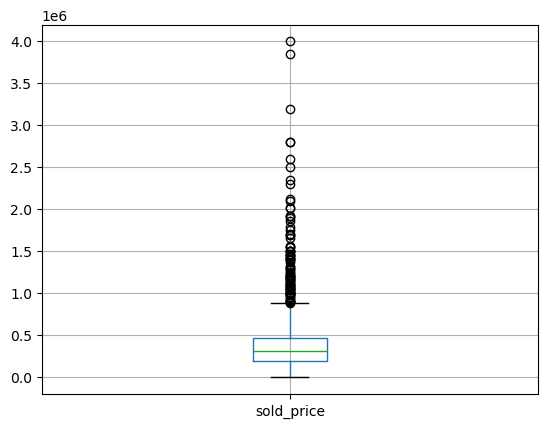

In [85]:
# Explore target with boxplot
df.boxplot(column=['sold_price'])
plt.show()

In [92]:
#Now only 6 instances of sold_price > 5 million
df.loc[df['sold_price'] > 2500000]

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,list_price,city,lat,lon,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,disability_features,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market
1737,3,2,1,2,3,2570.0,2600000.0,2569.0,2,condos,2017,False,3100000.0,Atlanta,33.790116,-84.383991,30309,Georgia,GA,175000.0,9408442388,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,2024,5,2023,227
3220,3,2,1,2,1,2126.0,3999999.0,2126.0,1,condos,1988,False,3999999.0,Boston,42.351826,-71.069901,02116,Massachusetts,MA,488001.0,3458316927,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2024,1,2023,375
4358,9,7,2,6,4,101930.0,3200000.0,11218.0,2,single_family,2003,False,3190000.0,Raleigh,35.952504,-78.617690,27614,North Carolina,NC,0.0,6007726455,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,2024,10,2023,81
6459,7,5,2,5,2,14893.0,2800000.0,6225.0,3,single_family,1932,False,2800000.0,Providence,41.824826,-71.395700,02906,Rhode Island,RI,0.0,3480763712,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2024,10,2023,73
6477,5,3,2,6,2,21366.0,2800000.0,6551.0,3,single_family,1929,False,2800000.0,Providence,41.837295,-71.396569,02906,Rhode Island,RI,0.0,3543135527,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2024,9,2023,100
6841,5,4,1,5,0,29621.0,3850000.0,5519.0,1,single_family,2017,False,3850000.0,Nashville,36.090894,-86.785645,37204,Tennessee,TN,0.0,8288061265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2023,5,2023,75


In [93]:
#Drop rows where sold price > 2.5million
sold_price_outlier_indices = df.loc[df['sold_price'] > 2500000].index
print(sold_price_outlier_indices)
df = df.drop(index = sold_price_outlier_indices)

Index([1737, 3220, 4358, 6459, 6477, 6841], dtype='int64')


C:\Users\alexa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


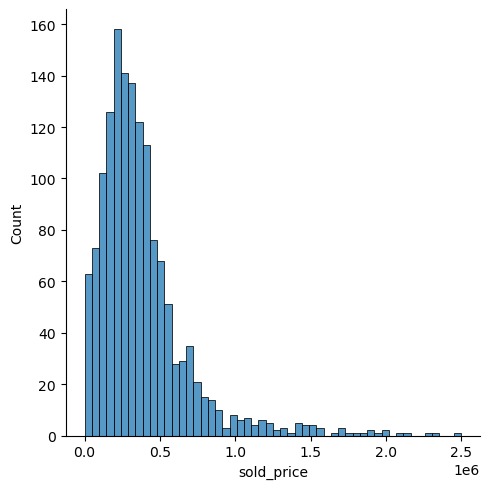

In [94]:
sns.displot(df['sold_price'])
plt.show()

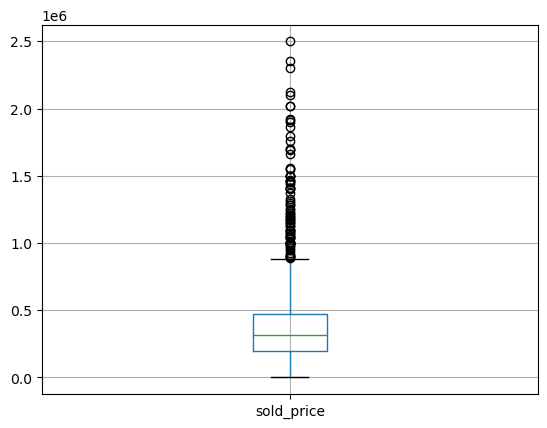

In [95]:
# Explore target with boxplot
df.boxplot(column=['sold_price'])
plt.show()

**-Define target and features from dataframe**

In [96]:
# Extract feature and target arrays
# X, y = df_from_csv.drop('sold_price', axis=1), df_from_csv[['sold_price']]
X, y = df.drop('sold_price', axis=1), df[['sold_price']]

# cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
# num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [77]:
# # Drop rows with non-numeric or empty values in 'sold_price'
# df = df[df['sold_price'].astype(str).str.isnumeric()]

# # Convert 'sold_price' column to integer
# df['sold_price'] = df['sold_price'].astype(int)

In [98]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr_matrix = df.corr()
# plt.figure(figsize=(15, 12))
# sns.heatmap(corr_matrix[['sold_price']], annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

**-Dataframe to CSV**

In [79]:
# # print(df.info())
# df.shape
# df.head(1)

In [80]:
# df.to_csv('house_sales.csv', sep=',', header=True, index=False)

In [81]:
# df_from_csv = pd.read_csv('house_sales.csv')
# print(df_from_csv.shape)
# df_from_csv.head(1)

**-To Be Continued...**<br>
-Ensure ordinal datatype is all the same (Example 3 and 3.0 should both jsut be 3)<br>
-Change Boolean values to Binary<br>
-Normalize or Scale Data<br>
-Create Mean House Sale Value by City Column<br>

-Complete JSONFramer

In [82]:
# JSONFramer = JSONFramer('../data')
# df = JSONFramer.frame().dropna_target()
# # df = JSONFramer.dropna_target()
# df.info()

In [83]:
# JSONFramer = JSONFramer('../data')
# df = JSONFramer.frame()
# df.reset_index(drop=True, inplace=True)
# df.info()

To be continued...